<a href="https://colab.research.google.com/github/rishabhnam002/CodSoft/blob/main/Task1_MOVIE_GENRE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [23]:
df = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

<ipython-input-23-fbb5d57183cf>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [24]:
display(df)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
4757,4758,Angshumaner Chhobi (2009),drama,"Angshuman, a young film director, comes back ..."
4758,4759,Kamerayla Izdivac (2010),documentary,The film shows us the unknown face of TV worl...
4759,4760,Lost: 2010 PaleyFest (2010),talk-show,The exclusive release of the PaleyFest2010 li...
4760,4761,Oy Vey! My Son Is Gay!! (2009),comedy,A romantic comedy featuring a Jewish family w...


In [25]:
display(df.head())
print(df.shape)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(4762, 4)


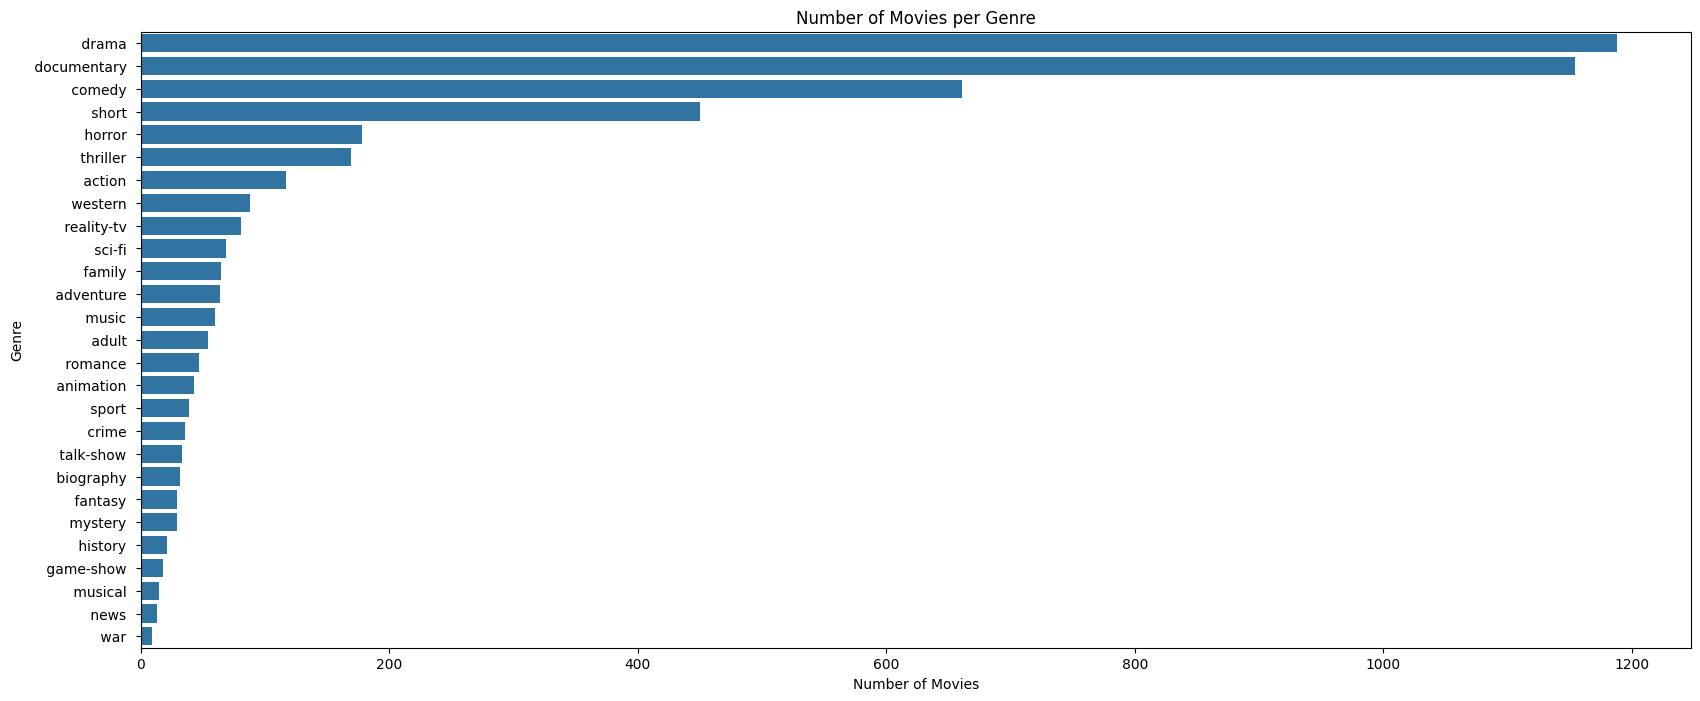

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(y=df['GENRE'], order = df['GENRE'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [27]:
df['DESCRIPTION'].fillna("", inplace=True)

In [29]:
t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(df['DESCRIPTION'])

In [30]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df['GENRE'])

In [31]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.4900314795383001
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.04      0.07        26
           1       0.67      0.17      0.27        12
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         7
           5       0.47      0.41      0.44       139
           6       0.00      0.00      0.00         4
           7       0.55      0.84      0.67       233
           8       0.45      0.72      0.55       229
           9       1.00      0.07      0.13        14
          10       0.00      0.00      0.00         4
          11       1.00      0.14      0.25         7
          12       0.00      0.00      0.00         3
          13       0.56      0.25      0.34        40
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         2
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [34]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [35]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

In [36]:
sample_descr_for_movie = "A movie where police cashes the criminal and shoot him"
print(predict_movie(sample_descr_for_movie))

 drama 


In [37]:

sample_descr_for_movie1 = "A movie where person cashes a girl too get marry with him but girl refuses him."
print(predict_movie(sample_descr_for_movie1))

 drama 
